# Classification task: fake news or real? 

In [1]:
from IPython.display import YouTubeVideo
import pandas as pd

# Fake Video news generation (GANs)

The New York Times on different types of fake news: <br> 1) Fake News: video and speech generation. <br> 2) Fake News as untrue information intentionally presented in news

In [ ]:
df = pd.read_excel('name.xls')

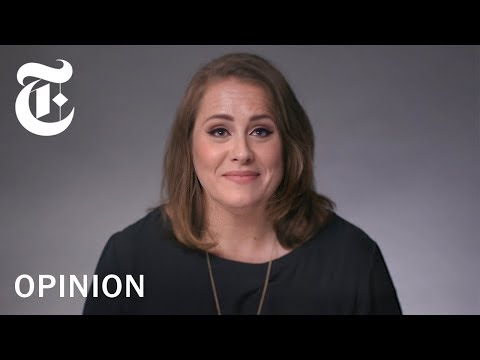

In [2]:
YouTubeVideo('1OqFY_2JE1c', width=500, height=300)

Bloomberg QuickTake explains how good deep fakes have gotten in the last years, and what's being done to counter them. Fake videos and audio keep getting better, faster and easier to make, increasing the mind-blowing technology's potential for harm if put in the wrong hands.

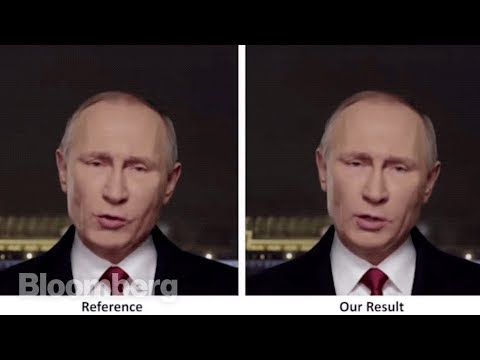

In [3]:
YouTubeVideo('gLoI9hAX9dw', width=500, height=300)

We will try to identify if the title of the article is fake or not.

In [5]:
import pandas as pd

In [14]:
data = pd.read_csv('fake_or_real_news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Bag of words and CountVectorizer

In [84]:
simple_train = ['You Can Smell Hillary’s Fear', 
                'Hillary to go to Paris in gesture of sympathy',
               'Why are voters going to ignore elections']

In [ ]:
#bag-of-words
{'can' : 1, 'youc': 1, ... }

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [17]:
vect.fit(simple_train)

CountVectorizer()

In [18]:
print(vect.get_feature_names())

['are', 'can', 'elections', 'fear', 'gesture', 'go', 'going', 'hillary', 'ignore', 'in', 'of', 'paris', 'smell', 'sympathy', 'to', 'voters', 'why', 'you']


Please note that basic text processing is already wired into our vectorizer. It converts the text to lower case, and with the help of regulars it takes only words consisting of numbers and letters (punctuation marks are removed).

We have already seen fit method in other algorithms, but transform transforms the data, if such is required by the results of "training".

In [20]:
# transform the original text into a matrix of features
simple_train_matrix = vect.transform(simple_train)

# each row is one observation (our document), each column is one feature (word).
# At the intersection - the number of words in the document.
simple_train_matrix

<3x18 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [21]:
simple_train_matrix.toarray()

array([[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

In [22]:
{'are': 1, 'to': 3, }

{'are': 1, 'to': 3}

In [23]:
pd.DataFrame(simple_train_matrix.toarray(), columns=vect.get_feature_names())

,are,can,elections,fear,gesture,go,going,hillary,ignore,in,of,paris,smell,sympathy,to,voters,why,you
0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,2,0,0,0
2,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0


In [24]:
# create new text for test and transform it with trained CountVectorizer

simple_test = ['Hillary is going to give a speech to the voters']
simple_test_matrix = vect.transform(simple_test)
simple_test_matrix.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0]])

In [25]:
simple_test_matrix.toarray().shape

(1, 18)

In [26]:
pd.DataFrame(simple_test_matrix.toarray(), columns=vect.get_feature_names())

,are,can,elections,fear,gesture,go,going,hillary,ignore,in,of,paris,smell,sympathy,to,voters,why,you
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,1,0,0


Transform for the test sample will ignore tokens that it has not seen before. Therefore, the large size of the training sample and its representativeness of the text corpus are important!

Last time we spoke about stemming and lemmatization. We also need to perform one of these methods to our data, but let me introduce two additional tools for working with texts in case if you need to analyze texts in Russian:

1) [Pymorphy library](https://pymorphy2.readthedocs.io/en/stable/user/index.html) <br>
2) nltk.RussianStemmer

In [42]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

print(lem.lemmatize('run'))
print(lem.lemmatize('running', pos='v'))
print(lem.lemmatize('ran', pos='v'))

run
run
run


In [43]:
from nltk.stem.snowball import RussianStemmer

rus_stemmer = RussianStemmer()

print(rus_stemmer.stem('бежать'))
print(rus_stemmer.stem('бегущий'))
print(rus_stemmer.stem('бегал'))

бежа
бегущ
бега


## Now, let's return back to our data set with news

In [27]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


The three main columns are named "title", "text", and "label".

Let's divide our data into training and test samples, so that later we can check how well our algorithm works. 
For **y** we denote our label. For the **X** column - the text of the news.

In [86]:
# Is there any imbalance in fake and real labels in our data set?

data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot:>

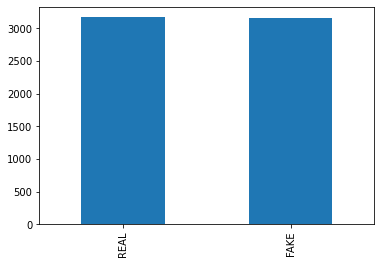

In [88]:
data['label'].value_counts().plot(kind='bar')

In [35]:
y = data['label']
X = data[['text']] # double brackets to keep it as a DataFrame instead of pd.Series

To divide the data into test and training samples, we will use the train_test_split function from the sklearn module. 

As the name implies, it divides the selection into parts and places the data across the selected arrays. Test_size indicates how much of the sample to postpone for the test.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [37]:
X_train.shape, X_test.shape

((4244, 1), (2091, 1))

In [38]:
print(X_train.iloc[1,0])

Following news of FBI Director James Comey’s decision to reopen the investigation into Hillary Clinton’s use of a private email server during her tenure at the State Department, federal law enforcement officials have come forward with new details on recently discovered evidence in the case.
More on this: DEVELOPING: FBI Reopens Investigation into Clinton Emails After New ‘Pertinent’ Evidence Discovered 
While Director Comey declined to provide specific details on what the newly discovered Clinton emails contained, federal law enforcements officials speaking under anonymity have explained that the emails were found on the personal devices of Clinton aide Huma Abedin and disgraced former Congressman Anthony Weiner.
The discovery came as part of investigation into yet another Weiner ‘sexting’ scandal, this time after he was alleged to have been engaging in sexually explicit conversations with an underage female.
More on the latest Weiner scandal: ‘Carlos Danger’ Strikes Again: New Reports

### Data cleansing and text preprocessing

Punctuation, numbers and stop words can be removed using NLTK and regular expressions.
When we clean up the text, we need to think about what problem we are solving. For many tasks, it makes sense to remove punctuation. On the other hand, we are solving the problem of sentiment analysis and there is a possibility that "!!!" or ":-(" may carry some mood and should be considered a word. In this task, we remove punctuation, but as an experiment you can leave it and see how it will affect the final result.

Likewise, we will remove the numbers, but usually, there are also various options for how to deal with them depending on the situation. For example, we can consider them words or replace them with the "NUM" placeholder.

To remove punctuation and numbers, let's use the ```re``` module, which allows us to use regular expressions.

In [47]:
def news_to_words(raw_news):

    # 1. Lowercase
    lower_case = raw_news.lower()
    
    # 2. Letters only     
    letters_only = re.findall(r'[a-z]+', lower_case)

    # 3. Remove stopwords
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in letters_only if not w in stops]   

    # 4. Lemmatize
    lem = WordNetLemmatizer()
    lemmatized = [lem.lemmatize(word) for word in meaningful_words]
    
    return( " ".join(lemmatized)) 

We will see further that this can be done automatically. But if we use a lemmatizer, then it would be better for him to transfer the "clean" text in lower case. Therefore, it is useful to be able to implement this if you solve more difficult problems.

This feature has two new elements. First, we have converted the stopword list to another data type - set. This is done to speed up the code. We'll call this function tens of thousands of times, and it should be fast, and search in a set is much faster in Python than in a list.

Secondly, we have combined all the words into one paragraph. This will make the output of words more convenient for the Bag of Words function. Let's call the function and check on our news.

In [40]:
import re
from nltk.corpus import stopwords

In [48]:
clean_news = news_to_words(X_train.iloc[4,0])
print(clean_news)

increasingly apparent u war islamic extremism put hold president obama national security team president obama failed even mention al qaeda state union address early january recent terrorist attack paris charlie hebdo magazine kosher supermarket gave u glimpse future terrorism look like civilized world defend time unfolding chaos yemen loss u partner fight al qaeda arabian peninsula aqap raise serious concern future country four month ago president obama cited successful model u led effort defeat islamic state iraq levant isil isil aqap two face enemy radical violent islam march around world isil confined syria iraq syria civil war dragged absence early forceful intervention part united state european nation chaotic situation spread iraq weak security service match emboldened terrorist army global support islamic state blossomed began supplant likeminded terrorist group islamic state counted affiliate algeria libya egypt saudi arabia isil even begun make inroad yemen united state involv

Now let's loop through the entire training set (this may take some time, depending on the power of your computer).

In [49]:
X_train['clean'] = X_train['text'].apply(news_to_words)

<ipython-input-49-0992bd3ad8b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['clean'] = X_train['text'].apply(news_to_words)


In [50]:
X_train.head()

,text,clean
5593,The next president is most likely to face an i...,next president likely face international crisi...
6067,Following news of FBI Director James Comey’s d...,following news fbi director james comey decisi...
3026,Interviews A protester throws a glass bottle c...,interview protester throw glass bottle contain...
4385,Will it be representative government or thugoc...,representative government thugocracy exclusive...
120,It is increasingly apparent that the U.S. war ...,increasingly apparent u war islamic extremism ...


In [51]:
# We initialize the "CountVectorizer" object, a method for working with bag of words

vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000) # limit the maximum
                                 # number of feature words to speed up
                                 # the algorithm's work. Without any limits
                                 # the number of features will be equal to all
                                 # unique words in our sample corpus

# fit_transform () does two things: First it trains the model
# and extracts the dictionary; Then, it transforms our training set
# into feature vector. We pass a list of words to fit_transform

train_data_features = vectorizer.fit_transform(X_train['clean'])

# Using convenient arrays from Numpy

train_data_features = train_data_features.toarray()

In [52]:
print(train_data_features.shape)

(4244, 5000)


In [53]:
train_data_features[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

It has 4244 lines and 5,000 features (one for each word in the dictionary).

It is worth noting that CountVectorizer comes with built-in options for automatic preprocessing, tokenization and removal of stop words - for each of these options, instead of "None", we could use built-in methods or specify our own function that will do it.

Now our Bag of Words model is trained, let's look at the resulting dictionary:

In [54]:
vocab = vectorizer.get_feature_names()
print(vocab)

['abandon', 'abandoned', 'abc', 'abdullah', 'abedin', 'ability', 'able', 'abortion', 'abroad', 'absence', 'absent', 'absentee', 'absolute', 'absolutely', 'absurd', 'abuse', 'aca', 'academic', 'academy', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accident', 'accompanied', 'accomplish', 'accomplished', 'accomplishment', 'accord', 'according', 'account', 'accountability', 'accountable', 'accounting', 'accurate', 'accusation', 'accuse', 'accused', 'accusing', 'achieve', 'achieved', 'achievement', 'achieving', 'acknowledge', 'acknowledged', 'across', 'act', 'acted', 'acting', 'action', 'active', 'actively', 'activism', 'activist', 'activity', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'address', 'addressed', 'addressing', 'admin', 'administration', 'administrative', 'admiral', 'admission', 'admit', 'admits', 'admitted', 'admitting', 'adopt', 'adopted', 'adult', 'advance', 'advanced', 'advant

Additionally, you can display how many times a word occurs in the dictionary:

In [90]:
import numpy as np

# Counts the number of words in our data
dist = np.sum(train_data_features, axis=0)

# Display a frequency of each word

for tag, count in zip(vocab, dist):
    print(count, tag)

81 abandon
77 abandoned
192 abc
63 abdullah
230 abedin
428 ability
855 able
499 abortion
151 abroad
95 absence
59 absent
47 absentee
94 absolute
260 absolutely
62 absurd
210 abuse
56 aca
99 academic
55 academy
290 accept
85 acceptable
72 acceptance
146 accepted
65 accepting
587 access
58 accident
51 accompanied
67 accomplish
68 accomplished
63 accomplishment
53 accord
2089 according
602 account
91 accountability
96 accountable
47 accounting
93 accurate
164 accusation
56 accuse
353 accused
86 accusing
140 achieve
79 achieved
91 achievement
47 achieving
105 acknowledge
154 acknowledged
946 across
1262 act
62 acted
153 acting
1263 action
169 active
117 actively
47 activism
442 activist
436 activity
113 actor
250 actual
1099 actually
391 ad
118 adam
439 add
848 added
338 adding
266 addition
281 additional
73 additionally
619 address
122 addressed
97 addressing
53 admin
1443 administration
52 administrative
120 admiral
54 admission
105 admit
54 admits
153 admitted
51 admitting
77 adopt
116 

213 dark
772 data
121 database
260 date
53 dating
293 daughter
62 dave
519 david
211 davis
3762 day
76 dc
367 de
88 dea
429 dead
119 deadline
129 deadly
1707 deal
195 dealing
51 dean
84 dear
913 death
2166 debate
59 debbie
551 debt
53 dec
838 decade
323 december
57 decent
49 deception
279 decide
442 decided
81 decides
70 deciding
1228 decision
61 decisive
81 declaration
107 declare
324 declared
96 declaring
230 decline
247 declined
86 declining
53 decree
76 dedicated
78 deemed
391 deep
113 deeper
266 deeply
63 default
303 defeat
100 defeated
48 defeating
70 defence
252 defend
69 defendant
129 defended
59 defender
164 defending
800 defense
66 defensive
139 deficit
65 define
110 defined
141 definitely
147 definition
338 degree
50 delaware
121 delay
1065 delegate
48 delegation
71 deleted
83 deliberately
179 deliver
208 delivered
84 delivering
48 delivery
394 demand
74 demanded
111 demanding
450 democracy
2365 democrat
2690 democratic
147 demographic
73 demonstrate
87 demonstrated
69 demon

115 lobbyist
691 local
98 located
203 location
72 lock
73 locked
47 log
85 logic
167 london
58 lone
1965 long
545 longer
57 longstanding
153 longtime
1651 look
267 looked
708 looking
62 loose
85 lord
106 loretta
159 los
399 lose
88 loser
117 loses
255 losing
356 loss
666 lost
1306 lot
73 loud
98 louis
118 louisiana
635 love
112 loved
49 loving
551 low
393 lower
80 lowest
78 loyal
72 loyalty
49 lt
49 luck
74 lunch
63 luther
137 lying
261 lynch
326 machine
73 mad
2390 made
280 magazine
95 magic
59 magnesium
49 magnitude
395 mail
374 main
105 maine
80 mainly
453 mainstream
200 maintain
86 maintained
92 maintaining
52 maintains
1092 major
980 majority
3578 make
63 maker
1085 making
149 male
47 mall
165 malley
1442 man
225 manafort
84 manage
168 managed
177 management
319 manager
63 managing
129 mandate
90 mandatory
86 manhattan
49 manipulated
63 manipulation
120 manner
89 manufacturer
106 manufacturing
3858 many
176 map
71 mar
50 marc
624 march
421 marco
261 margin
117 marijuana
148 marine

369 possibility
955 possible
217 possibly
1473 post
396 posted
80 posting
54 pot
674 potential
247 potentially
58 pound
157 poverty
47 powell
1982 power
48 powered
440 powerful
81 practical
61 practically
363 practice
47 pragmatic
101 praise
113 praised
70 pray
112 prayer
179 pre
73 precedent
50 precious
90 precisely
67 predecessor
59 predict
51 predictable
142 predicted
93 prediction
106 prefer
89 preference
75 preferred
49 premise
128 premium
58 preparation
129 prepare
218 prepared
125 preparing
275 presence
447 present
54 presentation
127 presented
72 preserve
658 presidency
5963 president
2899 presidential
1171 press
114 pressed
68 pressing
364 pressure
142 presumptive
62 pretend
382 pretty
302 prevent
57 prevented
81 preventing
50 prevention
391 previous
298 previously
527 price
63 pride
80 priebus
115 primarily
1551 primary
424 prime
49 prince
49 principal
297 principle
200 print
188 prior
266 priority
425 prison
118 prisoner
124 privacy
943 private
79 privately
99 privilege
94 p

125 spokeswoman
75 sponsor
88 sponsored
88 sport
174 spot
75 spotlight
63 spray
179 spread
61 spreading
166 spring
93 spy
135 square
322 st
87 stability
66 stable
516 staff
171 staffer
622 stage
145 stahl
189 stake
68 stamp
172 stance
792 stand
548 standard
457 standing
58 standoff
492 star
56 stark
871 start
526 started
228 starting
48 startup
10007 state
256 stated
1291 statement
58 statewide
79 stating
263 station
136 statistic
333 status
64 statute
407 stay
70 stayed
87 staying
95 steady
102 steal
72 steel
106 stein
69 stem
645 step
94 stephen
78 stepped
134 steve
51 steven
92 stevens
121 stick
49 sticking
2272 still
216 stock
136 stolen
177 stone
216 stood
904 stop
216 stopped
62 stopping
56 storage
243 store
99 storm
1263 story
157 straight
80 strange
197 strategic
234 strategist
603 strategy
74 stream
1036 street
250 strength
54 strengthen
109 stress
97 stressed
108 stretch
56 strict
382 strike
110 striking
92 string
80 strip
767 strong
183 stronger
102 strongest
206 strongly
13

In [65]:
counts_of_words['baby']

255

## Models to predict 'fake' or 'real' label

In [68]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Random Forest
At the moment, we have the numerical values of the features from the training set from the Bag of Words and the original news labels, so let's start training the model to classify the news. First, we will use the Random Forest classifier. This algorithm is included in scikit-learn library. Below we indicate the number of trees - 100. More trees in most cases improves the result, but it takes longer to complete the training process. Likewise, the more features there are for each news article, the longer it will take.

In [69]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [71]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100) 

forest = forest.fit(train_data_features, y_train)

It remains only to run the pretrained Random Forest on our test set and check the prediction results.
But first, let's transform our test sample into a bag of words.

In [72]:
X_test['clean'] = X_test['text'].apply(news_to_words)

# Transform bag of words into Numpy array
test_data_features = vectorizer.transform(X_test['clean'])
test_data_features = test_data_features.toarray()

# Make predictions using Random Forest
result = forest.predict(test_data_features)

<ipython-input-72-adc9654dea43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['clean'] = X_test['text'].apply(news_to_words)


Check the quality of our model:

In [73]:
from sklearn import metrics

metrics.accuracy_score(y_test, result)

0.907221425155428

90% - Excellent result!

Let's see what signs influenced our result. The random forest algorithm is designed in such a way that during its operation it selects the most important features from its point of view (they are important because they split the sample most successfully).

In [74]:
import matplotlib.pyplot as plt

importances = forest.feature_importances_

In [75]:
# indices for sorting the most important features in descending order

indices = np.argsort(importances)[::-1]

feature_names = vectorizer.get_feature_names()

In [76]:
print("Feature ranking:")

for f in range(30): 
    print("%d. feature '%s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 'said' (0.019423)
2. feature 'republican' (0.014144)
3. feature 'october' (0.011600)
4. feature 'gop' (0.011068)
5. feature 'sen' (0.010745)
6. feature 'obama' (0.010516)
7. feature 'president' (0.010092)
8. feature 'article' (0.007123)
9. feature 'nomination' (0.006801)
10. feature 'primary' (0.006716)
11. feature 'com' (0.005722)
12. feature 'week' (0.005470)
13. feature 'candidate' (0.005447)
14. feature 'senate' (0.005234)
15. feature 'cruz' (0.005103)
16. feature 'share' (0.005032)
17. feature 'iowa' (0.004960)
18. feature 'conservative' (0.004464)
19. feature 'hillary' (0.004420)
20. feature 'ted' (0.004322)
21. feature 'governor' (0.004089)
22. feature 'monday' (0.004042)
23. feature 'tuesday' (0.003925)
24. feature 'state' (0.003832)
25. feature 'gov' (0.003740)
26. feature 'email' (0.003692)
27. feature 'presidential' (0.003421)
28. feature 'administration' (0.003381)
29. feature 'house' (0.003376)
30. feature 'debate' (0.003328)


As we can see, the very first sign is very important, the rest gradually lose their significance.
Now we will display the importance on a bar graph. To improve the graph, you also need to display the names of the features on the x scale.

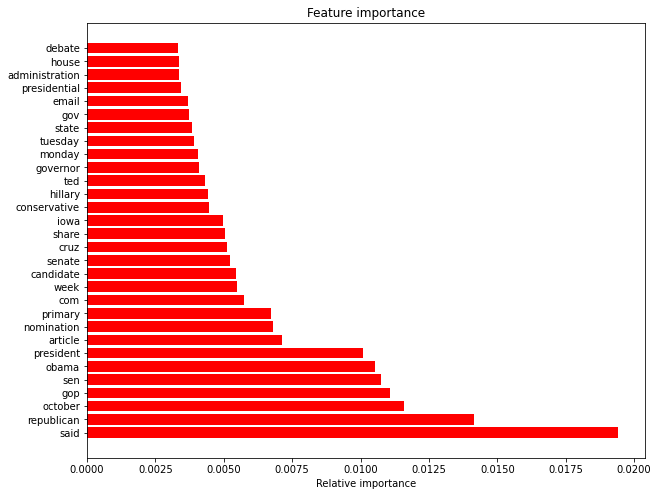

In [77]:
i = importances[indices]

plt.figure(figsize=(10, 8))
plt.title('Feature importance')
plt.barh(range(0,30),i[:30], color='r', align='center')
plt.yticks(range(0,30), [feature_names[indices[i]] for i in range(0,30)])
plt.xlabel('Relative importance')
plt.show()

## CountVectorizer

Let's try to train the model without our text clearing function and trust the CountVectorizer completely.
The CountVectorizer classifier will return us a list of tokens and the number of their occurrences in the training set.

In [78]:
count_vectorizer = CountVectorizer()

count_train = count_vectorizer.fit_transform(X_train['text'])
count_test = count_vectorizer.transform(X_test['text'])

What are the words in the new dictionary?

In [56]:
count_vectorizer.vocabulary_

{'the': 50559,
 'next': 34829,
 'president': 39568,
 'is': 27014,
 'most': 33627,
 'likely': 30027,
 'to': 51131,
 'face': 18843,
 'an': 3528,
 'international': 26613,
 'crisis': 12784,
 'shortly': 46029,
 'after': 2714,
 'taking': 49842,
 'office': 35831,
 'and': 3594,
 'both': 7508,
 'donald': 15912,
 'trump': 52036,
 'hillary': 24109,
 'clinton': 10591,
 'have': 23489,
 'credibility': 12687,
 'problem': 39796,
 'in': 25619,
 'foreign': 20345,
 'affairs': 2628,
 'former': 20441,
 'defense': 13948,
 'secretary': 45133,
 'robert': 43422,
 'gates': 21336,
 'said': 44152,
 'friday': 20780,
 'was': 54891,
 'senior': 45339,
 'advocate': 2589,
 'for': 20297,
 'using': 53630,
 'military': 32716,
 'bring': 7925,
 'ill': 25267,
 'fated': 19172,
 'regime': 42015,
 'change': 9690,
 'libya': 29921,
 'further': 21045,
 'failed': 18929,
 'anticipate': 3847,
 'chaos': 9714,
 'that': 50549,
 'would': 55969,
 'follow': 20227,
 'who': 55410,
 'has': 23401,
 'served': 45464,
 'eight': 16934,
 'president

Now let's see if our cleaning up the text affected the prediction quality.

In [79]:
forest = RandomForestClassifier(n_estimators = 100) 

forest = forest.fit(count_train, y_train)
print(metrics.accuracy_score(forest.predict(count_test), y_test))

0.8837876614060258


The quality is slightly worse, although not critical. ML is an experimental thing. We try and test different things and try to find what works worse and what works best for our data.

### TfidfVectorizer

In large texts, some words can occur very often (for example, “the”, “a”, “is” in English) while carrying little information about the true content of the text. Therefore, we can add weights with words.

Tf-idf stands for "frequency-inverse document frequency" and is a statistical measure used to assess the importance of a word in the context of a document that is part of a document collection or corpus. The weight of a word is proportional to the frequency of use of this word in a document and is inversely proportional to the frequency of use of a word in all documents of the collection.

Words with a high frequency within a specific document and with a low frequency of use in other documents will receive a lot of weight in TF-IDF.

![](https://miro.medium.com/fit/c/1838/551/1*V9ac4hLVyms79jl65Ym_Bw.jpeg)

Use Tfidvectorizer to convert data to tfidf weights.

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Restricted the output of words that are rarely found in texts,
# using the max_df parameter

tfidf_vectorizer = TfidfVectorizer(max_df = 0.7)

tfidf_train = tfidf_vectorizer.fit_transform(X_train['text'])
tfidf_test = tfidf_vectorizer.transform(X_test['text'])

# Выведем 10 первых признаков
print(tfidf_vectorizer.get_feature_names()[:5])

# Выведем первые 5 векторов обучающей выборки
print(tfidf_train.A[:5])

['00', '000', '0000', '000000031', '00000031']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


So far, these words are not found in the texts, when we initiated our classifier, we indicated that it should not take into account words that are very rare. Therefore, he set them to 0. It is also worth mentioning that matrices can be very sparse.
Let's see what data we have somewhere in the middle of the table.

In [81]:
print(tfidf_vectorizer.get_feature_names()[3000:3020])

['alarms', 'alas', 'alaska', 'alaskan', 'alaskans', 'alaweed', 'alawite', 'albania', 'albanian', 'albanians', 'albans', 'albany', 'albarello', 'albasha', 'albatross', 'albeit', 'albemarle', 'albergate', 'albers', 'albert']


### Naive Bayes classifier

Let's use the Naive Bayes classifier to determine the accuracy of our prediction. It will try to estimate the conditinal probabilities: "if the current word is in the text of the news, then how likely is this news to be fake?"

In [82]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

metrics.accuracy_score(y_test, pred)

0.8813964610234337

88% is a pretty good result for a first run. It was a bag of words made by CountVectorizer.
Let's calculate the accuracy for TfidfVectorizer

In [83]:
nb_classifier.fit(tfidf_train, y_train)
pred_tfidf = nb_classifier.predict(tfidf_test)

metrics.accuracy_score(y_test, pred_tfidf)

0.793400286944046

79%. It's worse, but do not forget that the parameters passed to the model can greatly improve the result.

It turns out that the Random Forest classifier and our text clearing function did a little better than the Naive Bayes classifier with CountVectorizer and TfidfVectorizer.

### Metrics for binary classification

We use accuracy as our measure of model's quality. However, there are many metrics for binary classification:

In [62]:
metrics.confusion_matrix(y_test, pred)

array([[907, 164],
       [ 84, 936]])

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png)